### Sentemint Analysis in twitter

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

**Load twitter dataset**

In [2]:
tw_df = pd.read_csv("Twitter_Data.csv")

tw_df.shape

(162980, 2)

In [3]:
tw_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
tw_df.isna().sum()

clean_text    4
category      7
dtype: int64

In [6]:
tw_df.dropna(inplace=True)

In [7]:
tw_df.duplicated().sum()

np.int64(0)

In [8]:
tw_df["category"].value_counts()

category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

In [9]:
# min_samples = 35509

# df_1 = tw_df[tw_df.category==1.0].sample(min_samples , random_state=42)
# df_0  = tw_df[tw_df["category"]==0.0].sample(min_samples , random_state=42)
# df_neg_1 = tw_df[tw_df["category"]==-1.0].sample(min_samples , random_state = 42)

# df_balance = pd.concat([df_1,df_0,df_neg_1],axis=0)
# df_balance["category"].value_counts()

In [10]:
# df_balance.tail()

*Split data to X & y* 

In [11]:
X = tw_df["clean_text"]
y = tw_df["category"]

**Splitting data to train & test sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42
                                                     , shuffle=True,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(130375,) (32594,) (130375,) (32594,)


In [13]:
# ==========================
# 1. Naive Bayes🙅‍♂️
# ==========================
nb_model = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", MultinomialNB())
])

nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("🔹 Naive Bayes Results 🙅‍♂️:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


🔹 Naive Bayes Results 🙅‍♂️:
Accuracy: 0.7530220285942198
              precision    recall  f1-score   support

        -1.0       0.75      0.61      0.68      7102
         0.0       0.92      0.62      0.74     11042
         1.0       0.69      0.92      0.79     14450

    accuracy                           0.75     32594
   macro avg       0.79      0.72      0.74     32594
weighted avg       0.78      0.75      0.75     32594



In [14]:

# ==========================
# 2. Logistic Regression👌✔️
# ==========================
lr_model = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("🔹 Logistic Regression Results 👌:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

🔹 Logistic Regression Results 👌:
Accuracy: 0.9462477756642327
              precision    recall  f1-score   support

        -1.0       0.92      0.88      0.90      7102
         0.0       0.96      0.98      0.97     11042
         1.0       0.95      0.96      0.95     14450

    accuracy                           0.95     32594
   macro avg       0.94      0.94      0.94     32594
weighted avg       0.95      0.95      0.95     32594



In [15]:
cm = confusion_matrix(y_test,lr_pred)
cm

array([[ 6221,   283,   598],
       [   99, 10811,   132],
       [  430,   210, 13810]])

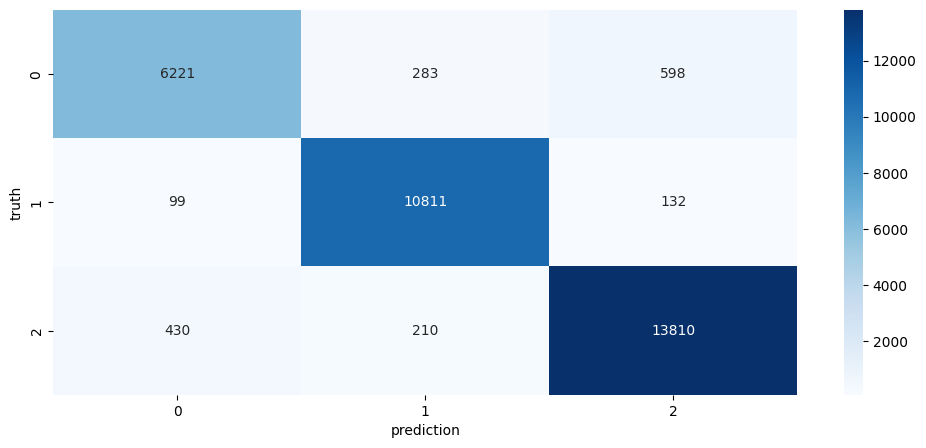

In [16]:
plt.figure(figsize = (12,5))
sns.heatmap(cm, annot=True , cmap ="Blues" , fmt="d")
plt.xlabel("prediction")
plt.ylabel("truth")
plt.show()

**===================================================================**

### Sentemint Analysis in Reddit

In [17]:
rd_df = pd.read_csv("Reddit_Data.csv")
rd_df.shape

(37249, 2)

In [18]:
rd_df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [19]:
rd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [20]:
rd_df.isna().sum()

clean_comment    100
category           0
dtype: int64

In [21]:
rd_df.dropna(inplace = True)

In [22]:
rd_df.duplicated().sum()

np.int64(350)

In [23]:
rd_df.drop_duplicates(inplace = True)

In [24]:
rd_df.shape

(36799, 2)

In [25]:
rd_df["category"].value_counts()

category
 1    15771
 0    12778
-1     8250
Name: count, dtype: int64

In [26]:
X = rd_df["clean_comment"]
y = rd_df["category"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42 , shuffle=True, stratify = y)
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(29439,) (7360,) (29439,) (7360,)


In [28]:
# ==========================
# 1. Naive Bayes🙅‍♂️
# ==========================
nb_model = Pipeline([
    ("vectorizer" , CountVectorizer(ngram_range = (1,1))),
    ("classifier", MultinomialNB())
    
])


nb_model.fit(X_train,y_train)

nb_pred = nb_model.predict(X_test)


print("🔹 Naive Bayes Results 🙅‍♂️:")
print("Accuracy : " ,accuracy_score(y_test,nb_pred))
print(classification_report(y_test,nb_pred ))

🔹 Naive Bayes Results 🙅‍♂️:
Accuracy :  0.61875
              precision    recall  f1-score   support

          -1       0.67      0.39      0.49      1650
           0       0.87      0.38      0.53      2556
           1       0.56      0.93      0.70      3154

    accuracy                           0.62      7360
   macro avg       0.70      0.57      0.57      7360
weighted avg       0.69      0.62      0.59      7360



In [33]:
#================================
# 2. KNN = K nearst neighbor 
#===============================
knn_model = Pipeline([
    ("vectorizer" , CountVectorizer(ngram_range = (1,1))),
    ("classifier" , KNeighborsClassifier(n_neighbors=3))
])


knn_model.fit(X_train,y_train)

knn_pred = knn_model.predict(X_test)

print(" 🔹 KNN Results 👎:")
print("Accuracy :" , accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

 🔹 KNN Results 👎:
Accuracy : 0.5139945652173913
              precision    recall  f1-score   support

          -1       0.45      0.22      0.29      1650
           0       0.46      0.95      0.62      2556
           1       0.79      0.31      0.45      3154

    accuracy                           0.51      7360
   macro avg       0.57      0.49      0.45      7360
weighted avg       0.60      0.51      0.47      7360



In [30]:
#================================
# 3. Logistic Regression✔️👌
#===============================
lr_model = Pipeline([
    ("vectorizer" , CountVectorizer(ngram_range = (1,1))),
    ("classifier" , LogisticRegression())
])


lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)

print(" 🔹 Logistic Regression Results 👌:")
print("Accuracy :" , accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

 🔹 Logistic Regression Results 👌:
Accuracy : 0.890625
              precision    recall  f1-score   support

          -1       0.86      0.76      0.81      1650
           0       0.89      0.97      0.93      2556
           1       0.91      0.89      0.90      3154

    accuracy                           0.89      7360
   macro avg       0.89      0.88      0.88      7360
weighted avg       0.89      0.89      0.89      7360



In [31]:
cm = confusion_matrix(y_test, lr_pred)
cm

array([[1261,  146,  243],
       [  41, 2479,   36],
       [ 165,  174, 2815]])

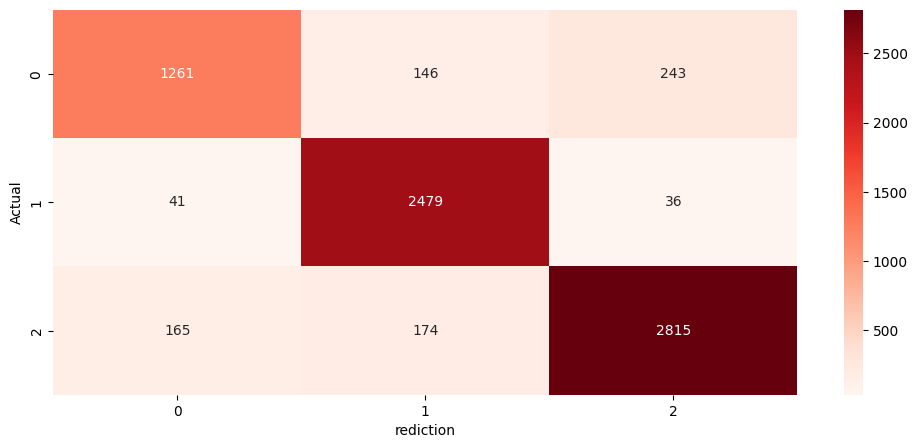

In [32]:
plt.figure(figsize = (12,5))

sns.heatmap(cm , annot=True , fmt="d",cmap="Reds")

plt.xlabel("rediction")
plt.ylabel("Actual")
plt.show()